In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from keras.models import load_model

from keras.optimizers import Adam
import keras.backend as K

In [9]:
z_dim = 100

## Load the Meow generator

In [4]:
G = load_model('../checkpoints/meow_generator/generator.h5')
G.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 1, 1, 100)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 4, 4, 2048)        3276800   
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 8, 8, 1024)        33554432  
_________________________________________________________________
activation_1 (Activation)    (None, 8, 8, 1024)        0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 16, 16, 512)       8388608   
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 512)       0         
__________

In [5]:
G.trainable = False
for layer in G.layers:
    layer.trainable = False

In [6]:
G.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 1, 1, 100)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 4, 4, 2048)        3276800   
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 8, 8, 1024)        33554432  
_________________________________________________________________
activation_1 (Activation)    (None, 8, 8, 1024)        0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 16, 16, 512)       8388608   
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 512)       0         
__________

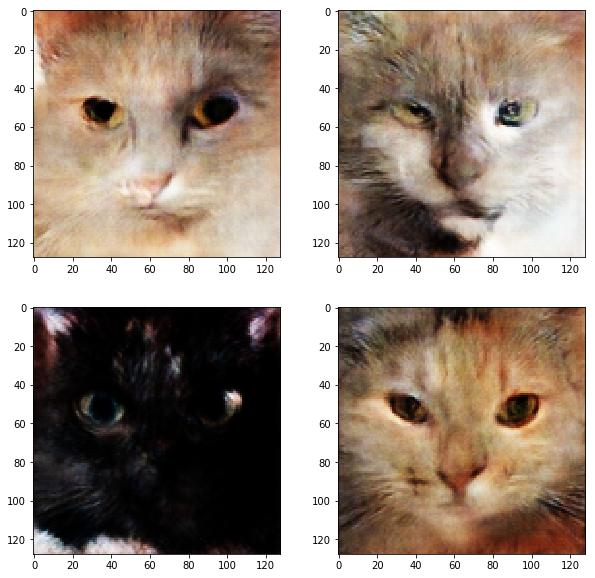

In [11]:
z_test = np.random.normal(size=(4, z_dim))
generated_imges = G.predict(z_test)
generated_imges = np.clip((generated_imges + 1.)*127.5, 0, 255).astype(np.uint8)
fig, axes = plt.subplots(figsize=(10, 10), ncols=2, nrows=2)
axes[0,0].imshow(generated_imges[0])
axes[0,1].imshow(generated_imges[1])
axes[1,0].imshow(generated_imges[2])
axes[1,1].imshow(generated_imges[3])

## Find the latent representation given a cat

In [12]:
from gan_utils import BatchGenerator

In [14]:
dataset_dir = '../data/cat_dataset/'
batch_gen = BatchGenerator(directory=dataset_dir, batch_size=1, target_size=(128, 128), pre_processing='tf')

Found 6444 images


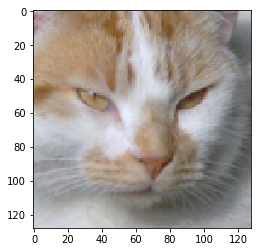

In [18]:
cat = batch_gen.next()
plt.imshow(np.clip((cat[0] + 1.)*127.5, 0, 255).astype(np.uint8))

In [26]:
latent_variable = K.variable(np.random.normal(size=(1, z_dim)))
output_generator = G(latent_variable)
print(output_generator)

Tensor("model_1_1/activation_5/Tanh:0", shape=(?, ?, ?, 3), dtype=float32)


In [27]:
target_tensor = K.constant(cat)

In [28]:
loss = K.sum(K.square(target_tensor-output_generator))
print(loss)

Tensor("Sum_1:0", shape=(), dtype=float32)


In [29]:
# create an optimizer
opt = Adam(lr=0.002)

# use it to minimize `loss` wrt `stylized_img_tensor`
updates = opt.get_updates([latent_variable], {}, loss)

# some values to return
to_return = [loss, output_generator, latent_variable]

train_step = K.function([], to_return, updates)

loss : 19923.564453125
(1, 128, 128, 3)


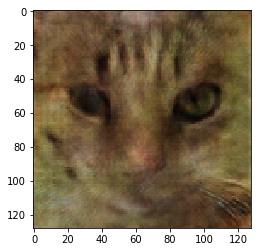

In [30]:
outputs = train_step([])
print("loss : {}".format(outputs[0]))
img = outputs[1]
z = outputs[2]
print(img.shape)
plt.imshow(np.clip((img[0] + 1.)*127.5, 0, 255).astype(np.uint8))

0  :  7230.427734375


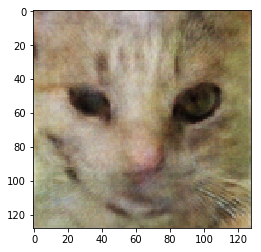

100  :  4936.212890625


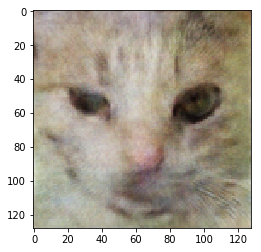

200  :  4075.877197265625


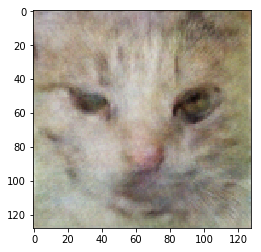

300  :  3482.26123046875


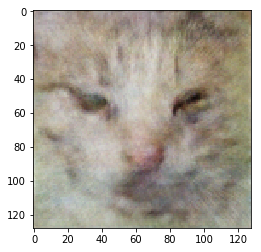

400  :  3196.03369140625


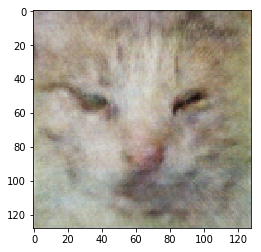

500  :  3040.572509765625


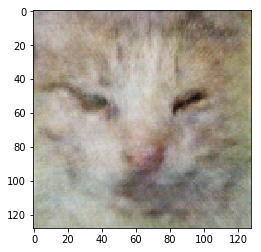

600  :  2930.454833984375


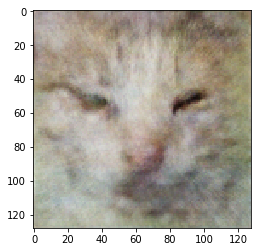

700  :  2838.629638671875


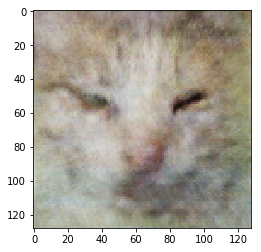

800  :  2758.4609375


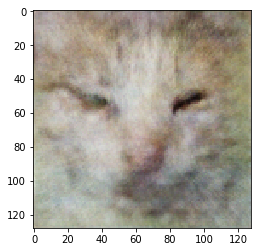

900  :  2683.9462890625


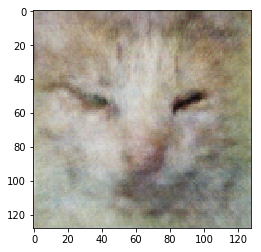

In [32]:
for i in range(1000):
    outputs = train_step([])
    if i%100 == 0:
        print("{}  :  {}".format(i,outputs[0]))
        img = outputs[1]
        plt.imshow(np.clip((img[0] + 1.)*127.5, 0, 255).astype(np.uint8))
        plt.show()

loss : 2611.96240234375
(1, 128, 128, 3)


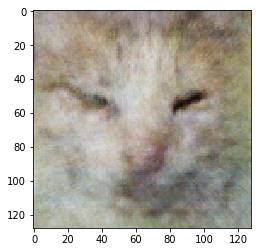

In [33]:
outputs = train_step([])
print("loss : {}".format(outputs[0]))
img = outputs[1]
z = outputs[2]
print(img.shape)
plt.imshow(np.clip((img[0] + 1.)*127.5, 0, 255).astype(np.uint8))